In [1]:
# -*- coding: utf-8 -*-

import multiprocessing as mp
first_run = 0
if first_run == 0:
	mp.set_start_method('forkserver')
	first_run = 1
	
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

figsize(14, 7)

/Users/Dupi/venv_py_3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Read file
train = pd.read_csv('train.csv')
train.drop('ID', axis=1, inplace=True)
test = pd.read_csv('test.csv')
Y = train.y
test_ID = test.ID

In [3]:
# Remove constant columns
constcols_train = list(train.loc[:, train.apply(lambda i: len(i.unique()) == 1)].columns)
goodcols = np.sort(list(set(train.columns).intersection(set(test.columns)) - set(constcols_train)))

train = pd.concat((train.y, train[goodcols[np.argsort([int(a.split('X')[1]) for a in goodcols])]]), axis=1)
test = test[goodcols[np.argsort([int(a.split('X')[1]) for a in goodcols])]]

In [4]:
# Label Encoder
for c in train.columns:
	if train[c].dtype == 'object':
		lbl = LabelEncoder()
		lbl.fit(list(train[c].values) + list(test[c].values))
		train[c] = lbl.transform(list(train[c].values))
		test[c] = lbl.transform(list(test[c].values))

In [5]:
# OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# X = enc.fit_transform(train.iloc[:, 1:]).todense().astype(int)
# X_final = enc.transform(test).astype(int).todense()

In [7]:
# Keep only categorical
X_categorical = train.drop('y', axis=1).iloc[:, 0:8]

In [8]:
# Correlation Heatmap
sns.set(context="paper", font="monospace")

# Compute categorical data correlation
df = X_categorical
corrmat = df.corr()

plt.figure('Corelogram', figsize=(17, 10))

# Draw the correlogramm using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Compute all data correlation heatmap
corrmat = train.drop('y', axis=1).corr()
plt.figure('Heatmap', figsize=(17, 17))
sns.heatmap(corrmat, vmax=.8, square=True, cmap=)
plt.axis('off')

SyntaxError: invalid syntax (<ipython-input-8-d9b60cabc2ca>, line 16)

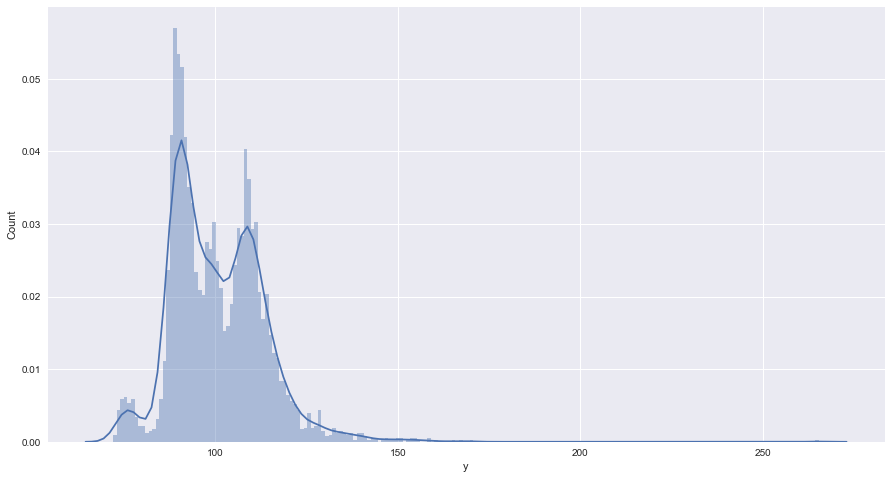

In [9]:
# Plot count versus time
plt.figure('Distribution', figsize(15, 8))
plt.ylabel('Count')
sns.distplot(train.y, bins=200)

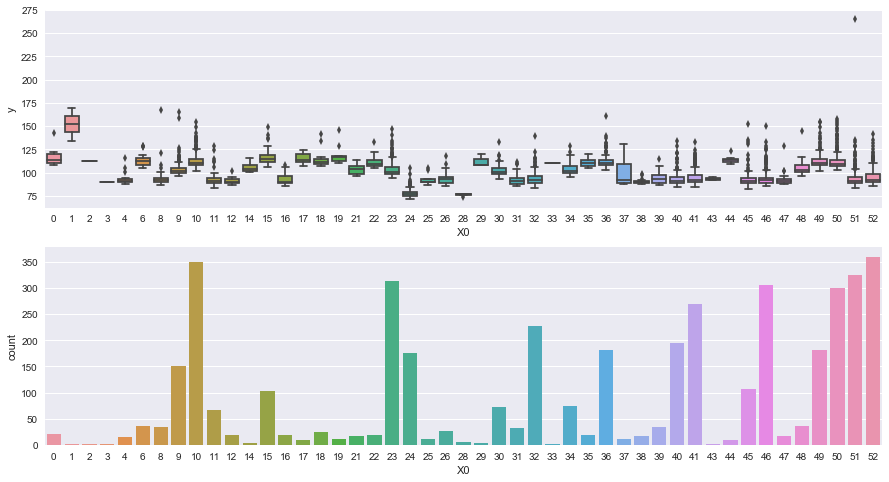

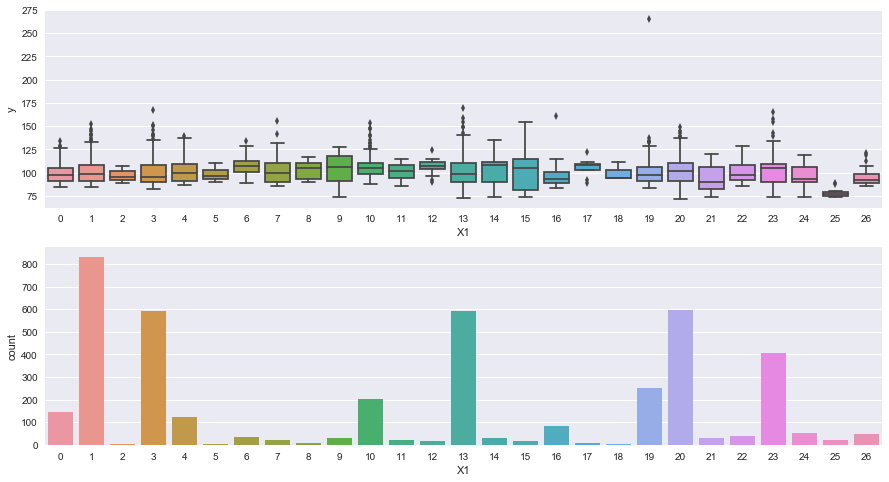

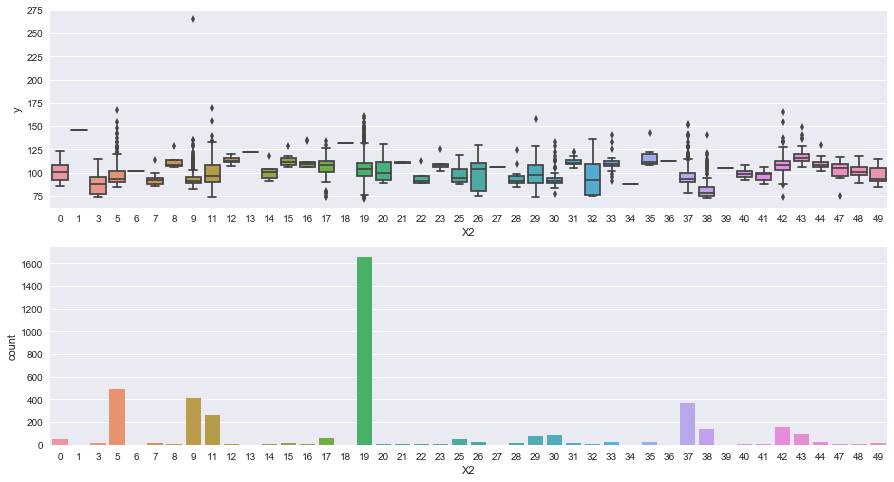

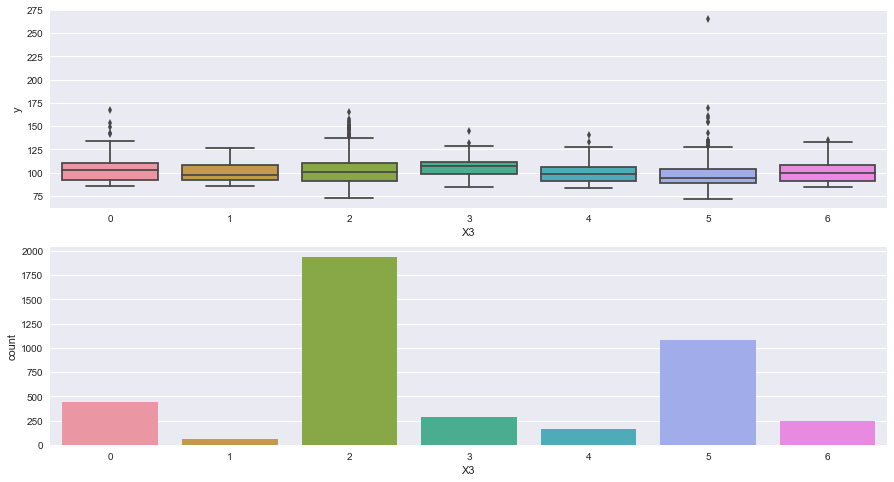

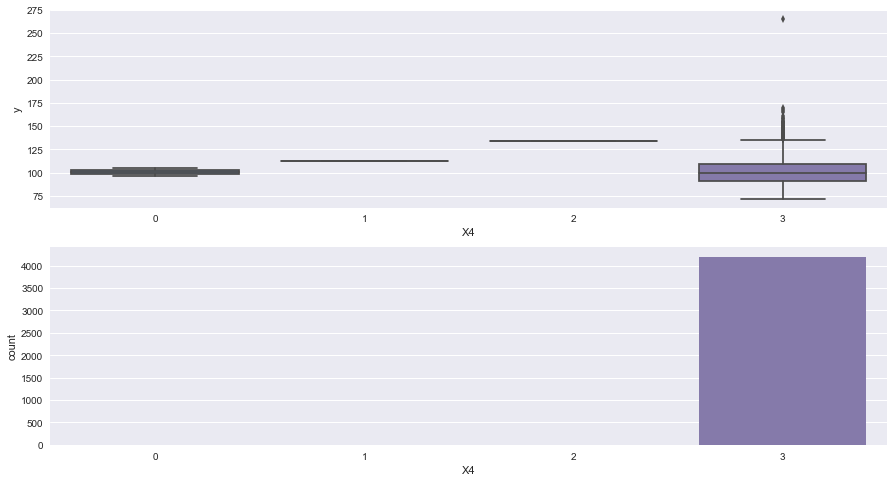

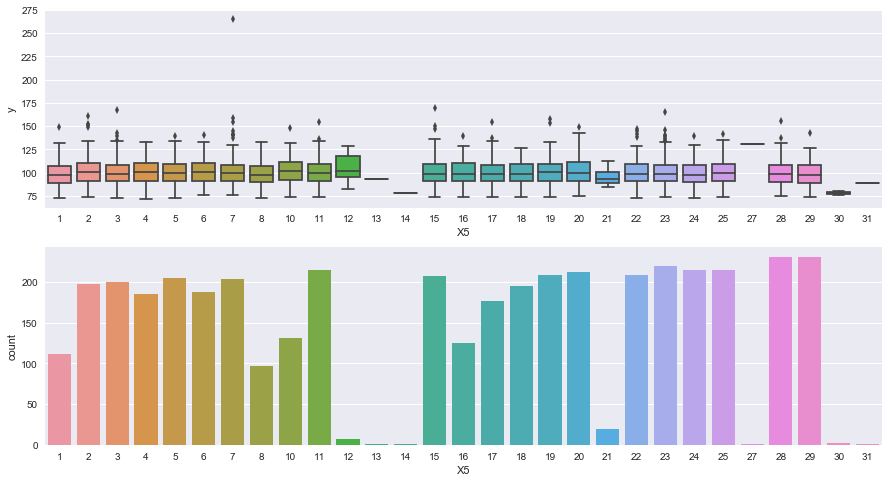

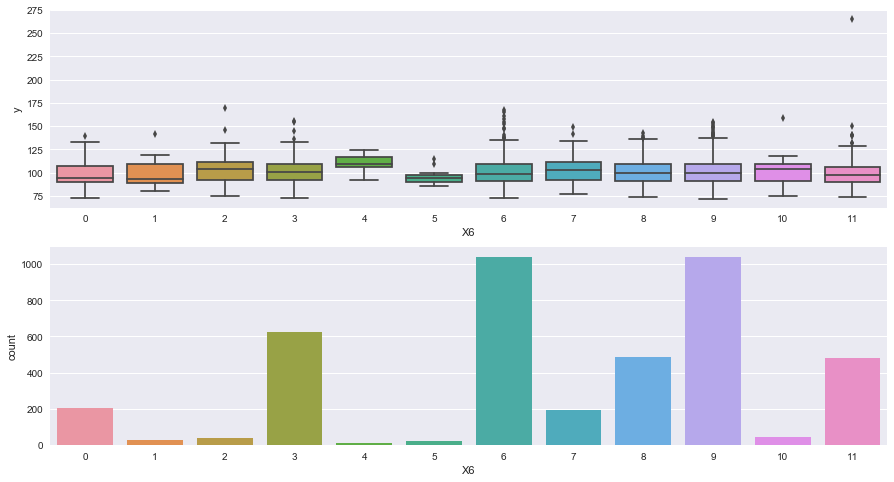

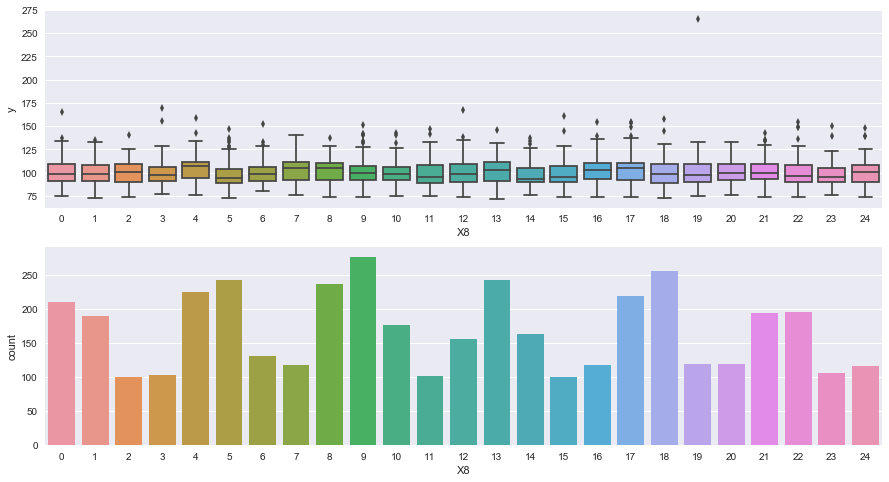

In [10]:
# Boxplot | Countplot categorical

i = 0
for k in X_categorical.keys():
	plt.figure(i, figsize=(15, 8))
	plt.subplot(211)
	sns.boxplot(x=k, y='y', data=train)
	plt.subplot(212)
	sns.countplot(x=k, data=train)
	i += 1

In [8]:
# MCA
import mca

X_mca = train

mca_ben = mca.mca(X_mca)
mca_ind = mca.mca(X_mca, benzecri=False)

In [9]:
# Factor score
N = 4

fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=X_mca.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, N+1)]))

table3.loc[fs,    :] = mca_ind.fs_r(N=N).T
table3.loc[cos,   :] = mca_ind.cos_r(N=N).T
table3.loc[cont,  :] = mca_ind.cont_r(N=N).T * 1000

X_mca_transform_ind = mca_ind.fs_r(N=N)
X_mca_transform_ben = mca_ben.fs_r(N=N)

np.round(table3.astype(float), 2)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
      <th>...</th>
      <th>4199</th>
      <th>4200</th>
      <th>4201</th>
      <th>4202</th>
      <th>4203</th>
      <th>4204</th>
      <th>4205</th>
      <th>4206</th>
      <th>4207</th>
      <th>4208</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="4" valign="top">Factor score</th>
      <th>1</th>
      <td>-0.16</td>
      <td>-0.07</td>
      <td>-1.03</td>
      <td>-1.02</td>
      <td>-1.05</td>
      <td>0.19</td>
      <td>-0.13</td>
      <td>-0.01</td>
      <td>-0.04</td>
      <td>0.19</td>
      <td>...</td>
      <td>0.14</td>
      <td>0.13</td>
      <td>-0.29</td>
      <td>-0.52</td>
      <td>-0.30</td>
      <td>-0.18</td>
      <td>-0.24</td>
      <td>-0.37</td>
      <td>-0.14</td>
      <td>0.16</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-0.30</td>
      <td>0.02</td>
      <td>0.38</td>
      <td>0.51</td>
      <td>0.60</td>
      <td>0.04</td>
      <td>0.02</td>
      <td>0.06</td>
      <td>0.01</td>
      <td>-0.05</td>
      <td>...</td>
      <td>0.10</td>
      <td>0.04</td>
      <td>-0.40</td>
      <td>-1.19</td>
      <td>-0.10</td>
      <td>-0.09</td>
      <td>-0.47</td>
      <td>-0.17</td>
      <td>0.05</td>
      <td>0.11</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-0.01</td>
      <td>0.07</td>
      <td>-0.50</td>
      <td>-0.52</td>
      <td>-0.58</td>
      <td>-0.21</td>
      <td>0.15</td>
      <td>0.23</td>
      <td>0.18</td>
      <td>-0.15</td>
      <td>...</td>
      <td>-0.16</td>
      <td>-0.09</td>
      <td>-0.04</td>
      <td>-0.29</td>
      <td>0.34</td>
      <td>0.24</td>
      <td>-0.17</td>
      <td>0.20</td>
      <td>0.14</td>
      <td>0.10</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.00</td>
      <td>-0.01</td>
      <td>0.06</td>
      <td>0.13</td>
      <td>0.14</td>
      <td>0.04</td>
      <td>-0.06</td>
      <td>-0.03</td>
      <td>-0.08</td>
      <td>-0.03</td>
      <td>...</td>
      <td>0.09</td>
      <td>0.04</td>
      <td>0.16</td>
      <td>0.19</td>
      <td>-0.23</td>
      <td>-0.16</td>
      <td>0.20</td>
      <td>-0.20</td>
      <td>0.01</td>
      <td>0.03</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">Squared cosines</th>
      <th>1</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.15</td>
      <td>0.07</td>
      <td>0.14</td>
      <td>0.09</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.05</td>
      <td>...</td>
      <td>0.01</td>
      <td>0.02</td>
      <td>0.02</td>
      <td>0.11</td>
      <td>0.10</td>
      <td>0.04</td>
      <td>0.01</td>
      <td>0.16</td>
      <td>0.03</td>
      <td>0.05</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.02</td>
      <td>0.02</td>
      <td>0.05</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.01</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>...</td>
      <td>0.01</td>
      <td>0.00</td>
      <td>0.04</td>
      <td>0.59</td>
      <td>0.01</td>
      <td>0.01</td>
      <td>0.04</td>
      <td>0.03</td>
      <td>0.00</td>
      <td>0.03</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.03</td>
      <td>0.02</td>
      <td>0.04</td>
      <td>0.11</td>
      <td>0.01</td>
      <td>0.16</td>
      <td>0.07</td>
      <td>0.03</td>
      <td>...</td>
      <td>0.01</td>
      <td>0.01</td>
      <td>0.00</td>
      <td>0.03</td>
      <td>0.12</td>
      <td>0.07</td>

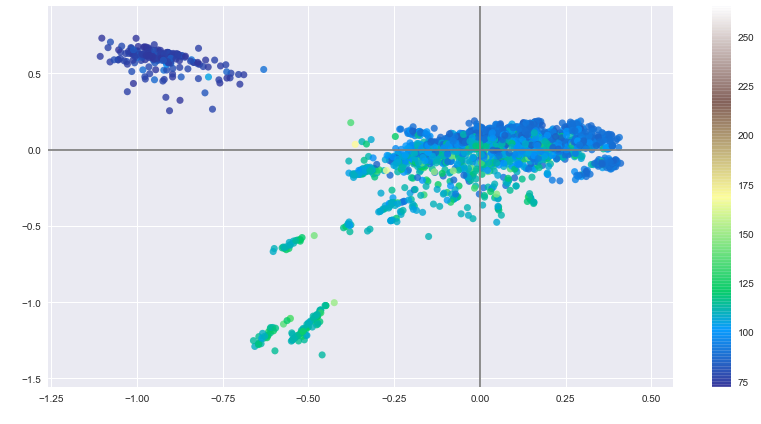

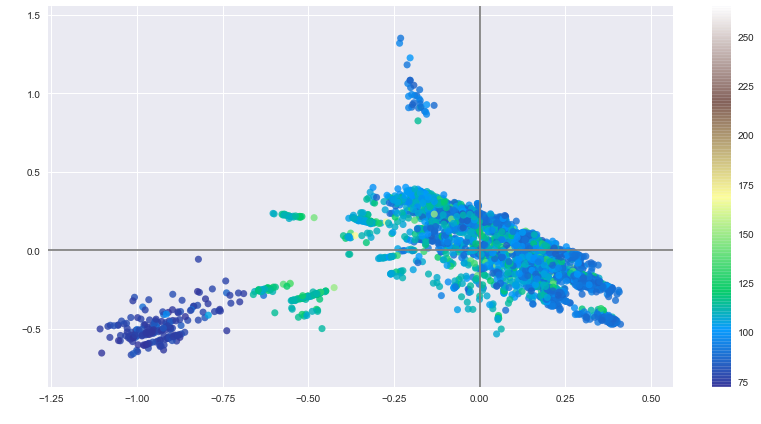

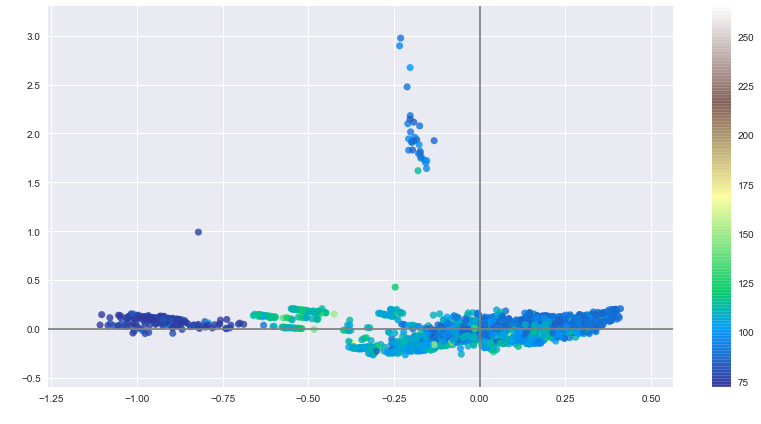

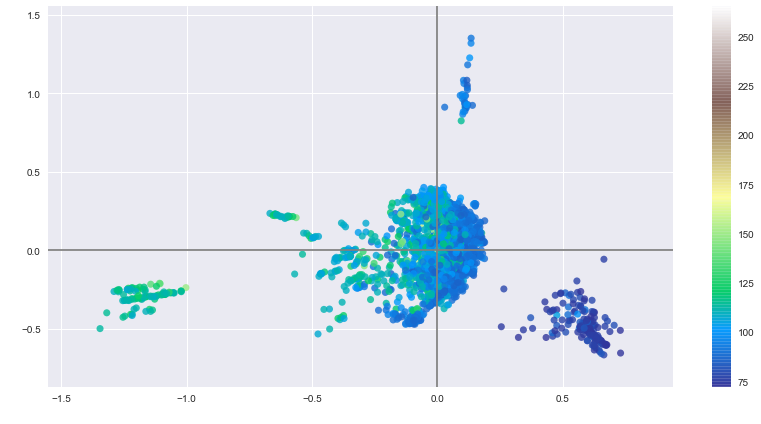

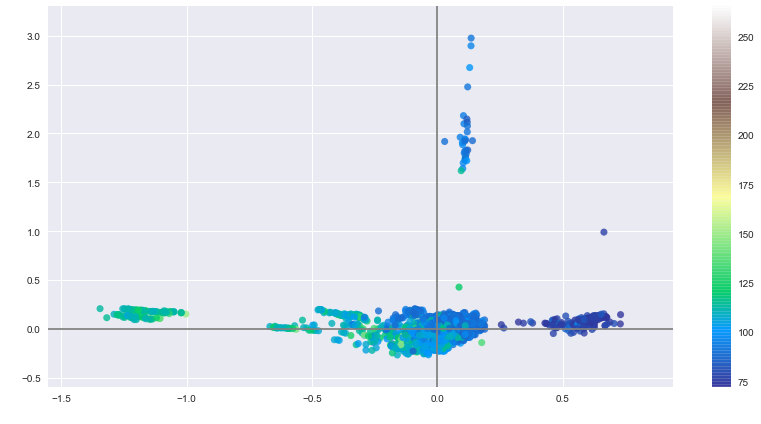

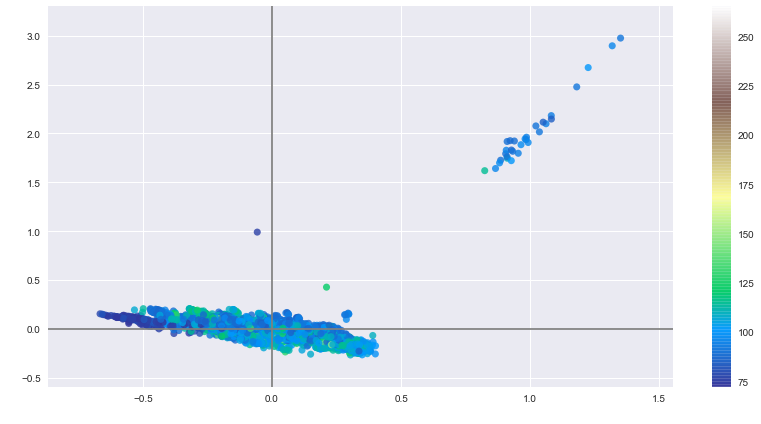

In [70]:
# Plot
cm = plt.cm.terrain
for i in range(0, 4):
	for j in range(i+1, 4):
		if i != j:
			points = table3.loc[fs].values[(i,j), :]
			labels = table3.columns.values
			plt.figure('MCA %s%s' % (i,j))
			plt.margins(0.1)
			plt.axhline(0, color='gray')
			plt.axvline(0, color='gray')
			plt.xlabel('Factor %s' %i, color='white')
			plt.ylabel('Factor %s' %j, color='white')
			sc = plt.scatter(*points, s=50, marker='o', c=X_mca.y, alpha=.8, linewidths=0, cmap=cm)
			plt.colorbar(sc)

In [6]:
# PLS Regression
from sklearn.cross_decomposition import PLSRegression 

n_comp = 3
X = train.drop('y', axis=1)
y = train.y

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
plsca = PLSRegression(n_components=n_comp)
plsca.fit(X_train, y_train)
X_r = plsca.transform(X)
X_train_r = plsca.transform(X_train)
X_test_r = plsca.transform(X_test)
test_r = plsca.transform(test)

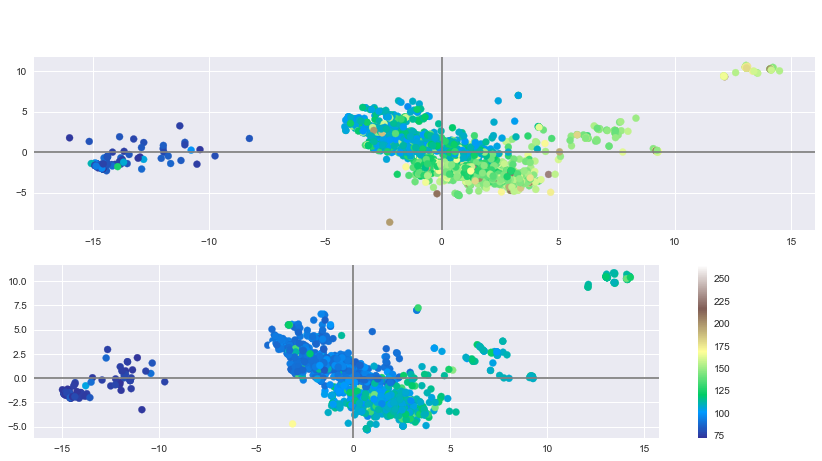

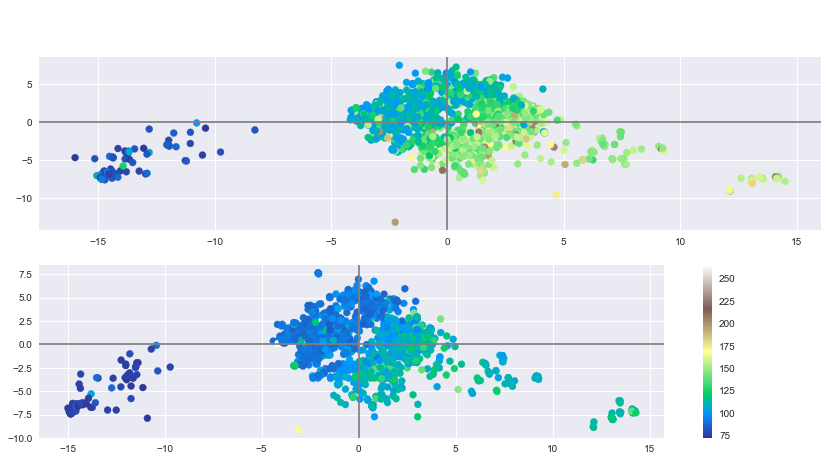

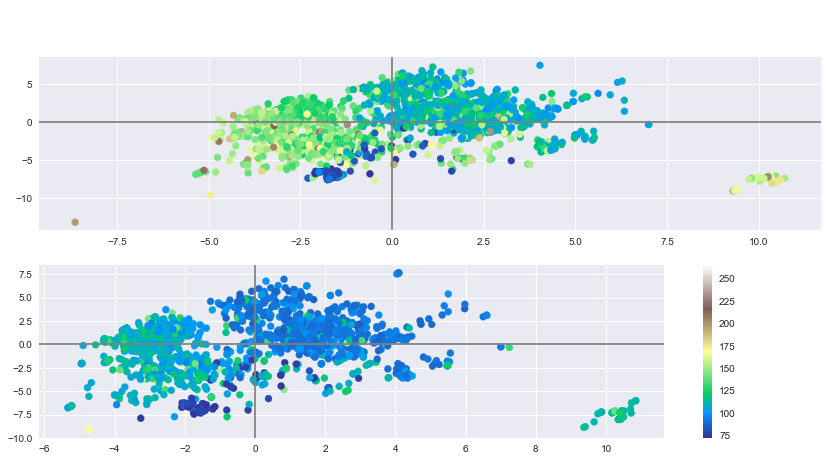

In [74]:
# Plot
for i in range(n_comp):
	for j in range(i+1, n_comp):
		plt.figure('%s' % (i+j))
		plt.subplot(211)
		plt.axhline(0, color='gray')
		plt.axvline(0, color='gray')
		plt.suptitle('Comp %s %s' % (i, j), color='white')
		plt.scatter(X_train_r[:, i], X_train_r[:, j], c=y_train, cmap=cm)
		plt.subplot(212)
		plt.scatter(X_test_r[:, i], X_test_r[:, j], c=y_test, cmap=cm)
		plt.axhline(0, color='gray')
		plt.axvline(0, color='gray')
		plt.colorbar()

In [36]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, ARDRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.kernel_ridge  import KernelRidge
from sklearn.metrics import r2_score

# Set the parameters by cross-validation
tuned_parameters = {'alpha': [0.01, 0.1, 1, 2], 'kernel':['linear', 'rbf', 'sigmoid','laplacian', 'polynomial']}

kr = RandomizedSearchCV(KernelRidge(), tuned_parameters, verbose=2, n_jobs=1, scoring='r2', cv=5)
# kr = RandomizedSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
#                   param_distributions={"alpha": [1e0, 0.1, 1e-2, 1e-3],
#                               "gamma": np.logspace(-2, 2, 5)}, verbose=2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] kernel=sigmoid, alpha=0.1 .......................................


[CV] ........................ kernel=sigmoid, alpha=0.1, total=   1.4s
[CV] kernel=sigmoid, alpha=0.1 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ........................ kernel=sigmoid, alpha=0.1, total=   1.4s
[CV] kernel=sigmoid, alpha=0.1 .......................................


[CV] ........................ kernel=sigmoid, alpha=0.1, total=   1.4s
[CV] kernel=sigmoid, alpha=0.1 .......................................


[CV] ........................ kernel=sigmoid, alpha=0.1, total=   1.5s
[CV] kernel=sigmoid, alpha=0.1 .......................................


[CV] ........................ kernel=sigmoid, alpha=0.1, total=   1.4s
[CV] kernel=sigmoid, alpha=0.01 ......................................


[CV] ....................... kernel=sigmoid, alpha=0.01, total=   1.4s
[CV] kernel=sigmoid, alpha=0.01 ......................................


[CV] ....................... kernel=sigmoid, alpha=0.01, total=   1.5s
[CV] kernel=sigmoid, alpha=0.01 ......................................


[CV] ....................... kernel=sigmoid, alpha=0.01, total=   1.5s
[CV] kernel=sigmoid, alpha=0.01 ......................................


[CV] ....................... kernel=sigmoid, alpha=0.01, total=   1.4s
[CV] kernel=sigmoid, alpha=0.01 ......................................


[CV] ....................... kernel=sigmoid, alpha=0.01, total=   1.4s
[CV] kernel=laplacian, alpha=2 .......................................


[CV] ........................ kernel=laplacian, alpha=2, total=   6.6s
[CV] kernel=laplacian, alpha=2 .......................................


[CV] ........................ kernel=laplacian, alpha=2, total=   6.3s
[CV] kernel=laplacian, alpha=2 .......................................


[CV] ........................ kernel=laplacian, alpha=2, total=   6.9s
[CV] kernel=laplacian, alpha=2 .......................................


[CV] ........................ kernel=laplacian, alpha=2, total=   6.2s
[CV] kernel=laplacian, alpha=2 .......................................


[CV] ........................ kernel=laplacian, alpha=2, total=   6.1s
[CV] kernel=linear, alpha=1 ..........................................


[CV] ........................... kernel=linear, alpha=1, total=   1.1s
[CV] kernel=linear, alpha=1 ..........................................


[CV] ........................... kernel=linear, alpha=1, total=   1.1s
[CV] kernel=linear, alpha=1 ..........................................


[CV] ........................... kernel=linear, alpha=1, total=   1.1s
[CV] kernel=linear, alpha=1 ..........................................


[CV] ........................... kernel=linear, alpha=1, total=   1.1s
[CV] kernel=linear, alpha=1 ..........................................


[CV] ........................... kernel=linear, alpha=1, total=   1.2s
[CV] kernel=linear, alpha=0.1 ........................................


[CV] ......................... kernel=linear, alpha=0.1, total=   1.2s
[CV] kernel=linear, alpha=0.1 ........................................


[CV] ......................... kernel=linear, alpha=0.1, total=   1.1s
[CV] kernel=linear, alpha=0.1 ........................................


[CV] ......................... kernel=linear, alpha=0.1, total=   1.2s
[CV] kernel=linear, alpha=0.1 ........................................


[CV] ......................... kernel=linear, alpha=0.1, total=   1.2s
[CV] kernel=linear, alpha=0.1 ........................................


[CV] ......................... kernel=linear, alpha=0.1, total=   1.1s
[CV] kernel=polynomial, alpha=2 ......................................


[CV] ....................... kernel=polynomial, alpha=2, total=   1.7s
[CV] kernel=polynomial, alpha=2 ......................................


[CV] ....................... kernel=polynomial, alpha=2, total=   1.7s
[CV] kernel=polynomial, alpha=2 ......................................


[CV] ....................... kernel=polynomial, alpha=2, total=   1.6s
[CV] kernel=polynomial, alpha=2 ......................................


[CV] ....................... kernel=polynomial, alpha=2, total=   1.5s
[CV] kernel=polynomial, alpha=2 ......................................


[CV] ....................... kernel=polynomial, alpha=2, total=   1.7s
[CV] kernel=laplacian, alpha=0.1 .....................................


[CV] ...................... kernel=laplacian, alpha=0.1, total=   6.4s
[CV] kernel=laplacian, alpha=0.1 .....................................


[CV] ...................... kernel=laplacian, alpha=0.1, total=   6.5s
[CV] kernel=laplacian, alpha=0.1 .....................................


[CV] ...................... kernel=laplacian, alpha=0.1, total=   6.3s
[CV] kernel=laplacian, alpha=0.1 .....................................


[CV] ...................... kernel=laplacian, alpha=0.1, total=   6.2s
[CV] kernel=laplacian, alpha=0.1 .....................................


[CV] ...................... kernel=laplacian, alpha=0.1, total=   6.4s
[CV] kernel=linear, alpha=0.01 .......................................


[CV] ........................ kernel=linear, alpha=0.01, total=   1.1s
[CV] kernel=linear, alpha=0.01 .......................................


[CV] ........................ kernel=linear, alpha=0.01, total=   1.2s
[CV] kernel=linear, alpha=0.01 .......................................


[CV] ........................ kernel=linear, alpha=0.01, total=   1.1s
[CV] kernel=linear, alpha=0.01 .......................................


[CV] ........................ kernel=linear, alpha=0.01, total=   1.2s
[CV] kernel=linear, alpha=0.01 .......................................


[CV] ........................ kernel=linear, alpha=0.01, total=   1.2s
[CV] kernel=rbf, alpha=0.1 ...........................................


[CV] ............................ kernel=rbf, alpha=0.1, total=   1.3s
[CV] kernel=rbf, alpha=0.1 ...........................................


[CV] ............................ kernel=rbf, alpha=0.1, total=   1.4s
[CV] kernel=rbf, alpha=0.1 ...........................................


[CV] ............................ kernel=rbf, alpha=0.1, total=   1.4s
[CV] kernel=rbf, alpha=0.1 ...........................................


[CV] ............................ kernel=rbf, alpha=0.1, total=   1.4s
[CV] kernel=rbf, alpha=0.1 ...........................................


[CV] ............................ kernel=rbf, alpha=0.1, total=   1.5s
[CV] kernel=polynomial, alpha=0.1 ....................................


[CV] ..................... kernel=polynomial, alpha=0.1, total=   1.8s
[CV] kernel=polynomial, alpha=0.1 ....................................


[CV] ..................... kernel=polynomial, alpha=0.1, total=   1.6s
[CV] kernel=polynomial, alpha=0.1 ....................................


[CV] ..................... kernel=polynomial, alpha=0.1, total=   1.7s
[CV] kernel=polynomial, alpha=0.1 ....................................


[CV] ..................... kernel=polynomial, alpha=0.1, total=   1.7s
[CV] kernel=polynomial, alpha=0.1 ....................................


[CV] ..................... kernel=polynomial, alpha=0.1, total=   1.7s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


[CV]  ................................................................


[CV] ................................................. , total=   7.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ................................................. , total=   7.2s
[CV]  ................................................................


[CV] ................................................. , total=   7.0s
[CV]  ................................................................


[CV] ................................................. , total=   7.0s
[CV]  ................................................................


[CV] ................................................. , total=   7.6s
[CV]  ................................................................


[CV] ................................................. , total=   7.4s
[CV]  ................................................................


[CV] ................................................. , total=   7.7s
[CV]  ................................................................


[CV] ................................................. , total=   7.3s
[CV]  ................................................................


[CV] ................................................. , total=   7.0s
[CV]  ................................................................


[CV] ................................................. , total=   7.0s
[ 0.55331114  0.61245801  0.55802173  0.54871079  0.37860577  0.64797564
  0.6210394   0.59199931  0.46849232  0.60291298]
Mean score: 0.55835271, Variance: 0.0058509329095


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


In [ ]:
tempX, tempy = shuffle(np.column_stack((X_r, X)), y)

kr.fit(tempX, tempy)
#kr = KernelRidge() 
#kr.fit(tempX, tempy)
#cv_score = r2_score(y, kr.predict(tempX))
cv_score = cross_val_score(kr.best_estimator_, tempX, tempy, cv=10, verbose=2, scoring='r2')
print(cv_score)
print('Mean score: %s, Variance: %s' % (np.mean(cv_score), np.var(cv_score)))

In [41]:
kr_best = KernelRidge(alpha=2, coef0=1, degree=3, gamma=None, kernel='laplacian',
      kernel_params=None)
kr_best.fit(tempX, tempy)

KernelRidge(alpha=2, coef0=1, degree=3, gamma=None, kernel='laplacian',
      kernel_params=None)

In [44]:
y_pred = kr_best.predict(np.column_stack((test_r, test)))
# make predictions and save results
output = pd.DataFrame({'id': test_ID, 'y': y_pred})
output.to_csv('submission_baseLine.csv', index=False)

In [43]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
5,8,y,aa,ai,e,d,x,g,s,0,...,1,0,0,0,0,0,0,0,0,0
6,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,0,1,0,0,0,0
7,11,f,s,ae,c,d,h,d,a,0,...,0,0,1,0,0,0,0,0,0,0
8,12,ap,l,s,c,d,h,j,n,0,...,0,0,0,0,0,0,0,0,0,0
9,14,o,v,as,f,d,g,f,v,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train_r.shape

(2525, 10)

In [28]:
### Regressor
import xgboost as xgb

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500,
    'eta': 0.004,
    'max_depth': 4,
    'subsample': 0.921,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(y_train),  # base prediction = mean(target)
    'silent': 1
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train_r, y_train)
dtest = xgb.DMatrix(test_r)

# xgboost, cross-validation
# cv_result = xgb.cv(xgb_params,
#                   dtrain,
#                   num_boost_round=1000, # increase to have better results (~700)
#                   early_stopping_rounds=50,
#                   verbose_eval=10,
#                   show_stdv=False
#                  )

# num_boost_rounds = len(cv_result)
# print('num_boost_rounds=' + str(num_boost_rounds))

num_boost_rounds = 1300
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

# check f2-score (to get higher score - increase num_boost_round in previous cell)
from sklearn.metrics import r2_score

print(r2_score(model.predict(dtrain), dtrain.get_label()))

0.571427755542


In [67]:
# make predictions and save results
y_pred = model.predict(dtest)

output = pd.DataFrame({'id': test_ID, 'y': y_pred})
output.to_csv('submission_baseLine.csv', index=False)